<a href="https://colab.research.google.com/github/fmanid/Tugas-Besar-PCVK-2022/blob/main/Tugas_Besar_PCVK_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
# Colab library to upload files to notebook
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


width: 180 pixels
height: 218 pixels
channels: 3


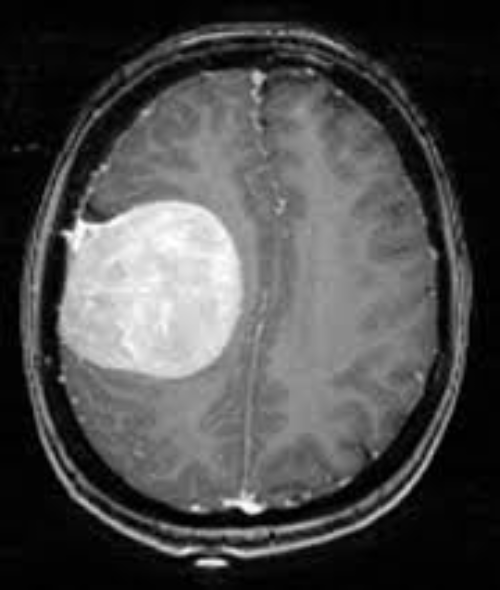

In [144]:
img_path = "/content/drive/MyDrive/Brain Tumor/Y1.jpg"
image = cv2.imread(img_path)
print("width: {} pixels".format(image.shape[1])) # menghitung lebar
print("height: {} pixels".format(image.shape[0])) # menghitung tinggi
print("channels: {}".format(image.shape[2])) # menghitung channels
dim=(500,590)
image=cv2.resize(image, dim)
cv2_imshow( image)

Thresholding = jika pixel value lebih kecil daripada nilai threshold, maka diset menjadi 0, jika lebih besar diset ke max value.

pada cv2.THRESH_BINARY dimana jika intensitas lebih besar dari ambang batas yang ditetapkan,maka nilai ditetapkan ke 255, jika kurang dari nilai threshold yang ditetapkan maka nilai 0. cv2.thresh_binary_inv adalah kebalikan dari cv2.thresh_binary.

pada bagian ini nilai threshold ditetapkan ke 155


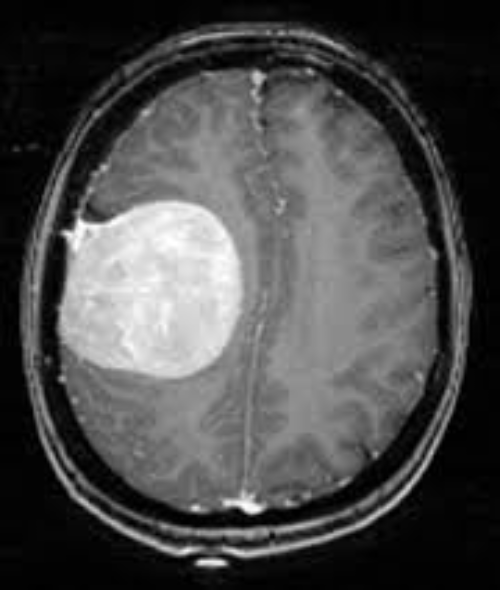

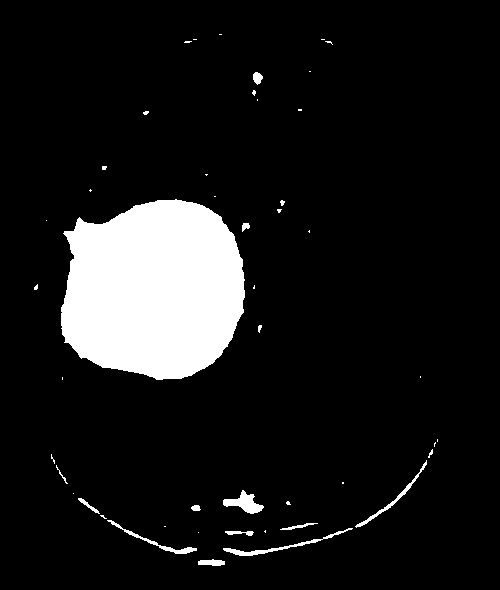

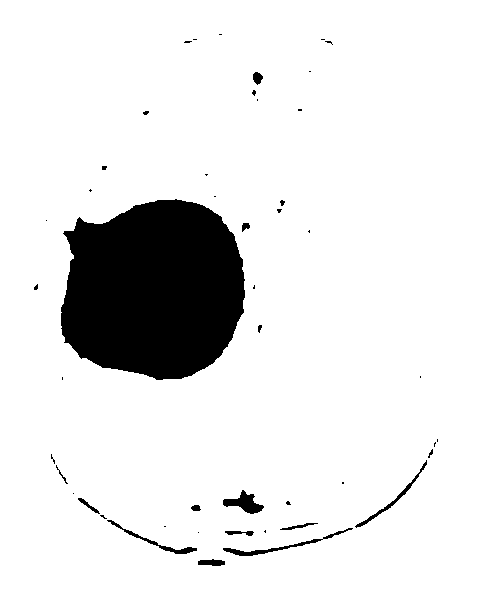

In [145]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray) #menampilkan citra grayscale

(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)  #menampilkan citra setelah dilakukan thresholding

(T, threshInv) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(threshInv) #menampilkan citra setelah dilakukan invertthresholding



Morphological Operation untuk menghapus bagian yang tidak perlu dari thresholding image.


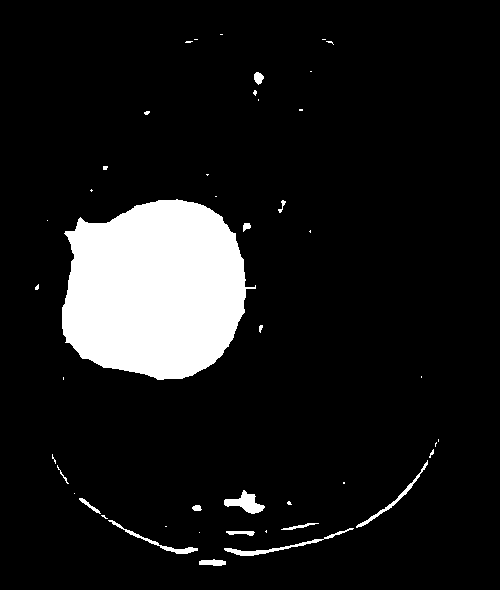

In [146]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel) #operasi closing Dilation followed by Erosion
cv2_imshow(closed)

In [147]:
closed = cv2.erode(closed, None, iterations = 14) #erosi dengan iterasi 14
closed = cv2.dilate(closed, None, iterations = 13) #dilasi dengan iterasi 13

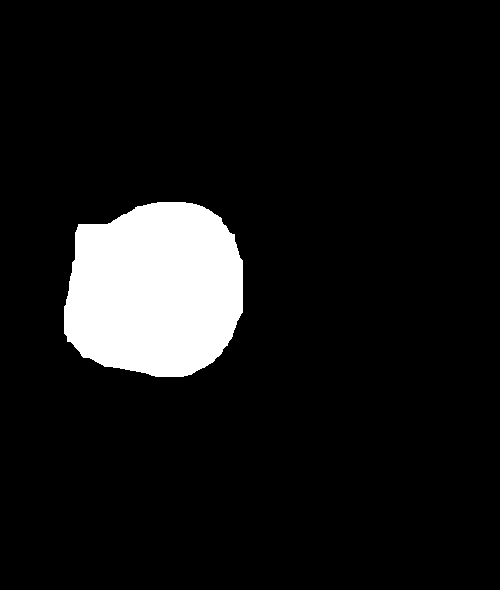

In [148]:
cv2_imshow(closed)

mengambil nilai median dan membangun dua threshold, upper dan lower. threshold ini dibangun berdasarkan persentase +/- yang dikendalikan oleh argumen sigma.

kenapa nilai sigma pakai 0.33? 
In practice, sigma=0.33 tends to give good results on most of the dataset I’m working with, so I choose to supply 33% as the default sigma value. (sumber : https://pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/)


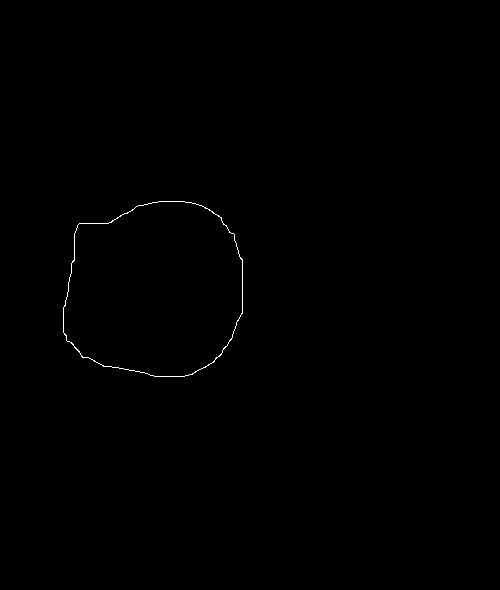

In [149]:
def auto_canny(image, sigma=0.33):
  # compute the median of the single channel pixel intensities
  v = np.median(image)
  # apply automatic Canny edge detection using the computed median
  lower = int(max(0, (1.0 - sigma) * v))
  upper = int(min(255, (1.0 + sigma) * v))
  edged = cv2.Canny(image, lower, upper)
  # return the edged image
  return edged
canny = auto_canny(closed)
cv2_imshow(canny)

Fungsi CV2.FindContours mengambil input gambar sumber dan metode pendekatan kontur dan mengeluarkan kontur, dan hierarki. ‘Contours‘ adalah daftar Python dari semua kontur dalam gambar. Setiap kontur  adalah array numpy dari (x, y) koordinat titik batas objek.cv2.chain_approx_simple menghapus semua titik yang berlebihan dan mengompres kontur, sehingga menghemat memori.

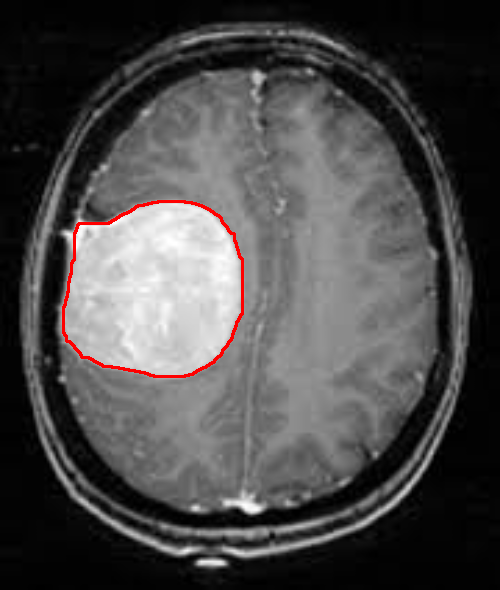

In [150]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, cnts, -1, (0, 0, 255), 2)
cv2_imshow(image) 

width: 825 pixels
height: 993 pixels
channels: 3


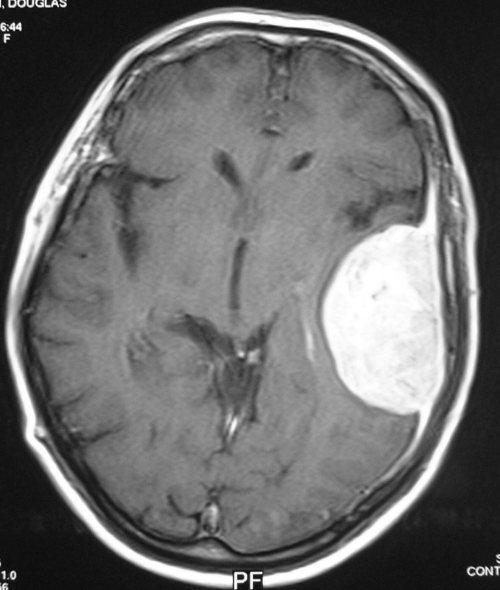

In [151]:
####### Detection kedua ##########
img_path = "/content/drive/MyDrive/Brain Tumor/Y103.jpg"
image = cv2.imread(img_path)
print("width: {} pixels".format(image.shape[1])) # menghitung lebar
print("height: {} pixels".format(image.shape[0])) # menghitung tinggi
print("channels: {}".format(image.shape[2])) # menghitung channels
dim=(500,590)
image=cv2.resize(image, dim)
cv2_imshow( image)

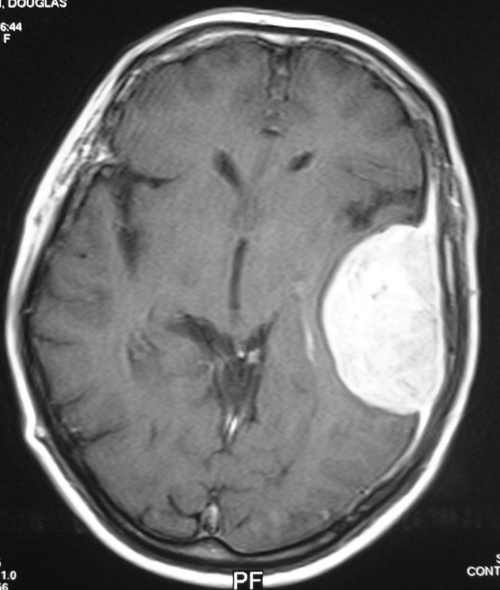

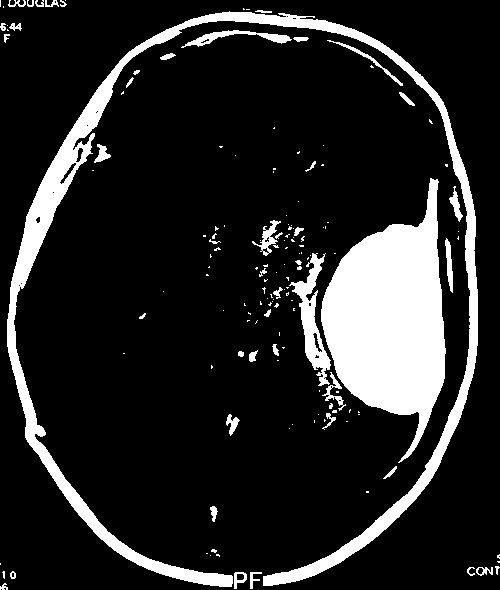

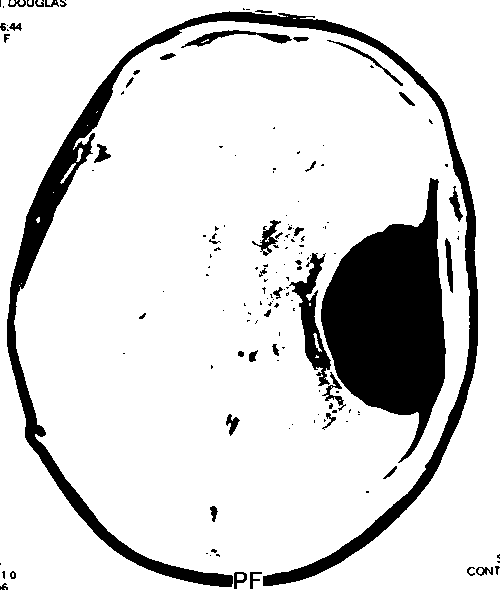

In [152]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray) #menampilkan citra grayscale

(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)  #menampilkan citra setelah dilakukan thresholding

(T, threshInv) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(threshInv) #menampilkan citra setelah dilakukan invertthresholding

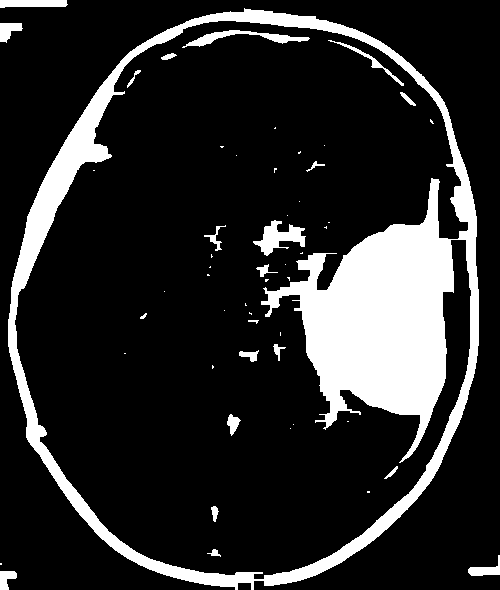

In [153]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel) #operasi closing Dilation followed by Erosion
cv2_imshow(closed)

In [154]:
closed = cv2.erode(closed, None, iterations = 30) #erosi dengan iterasi 14
closed = cv2.dilate(closed, None, iterations = 30) #dilasi dengan iterasi 13

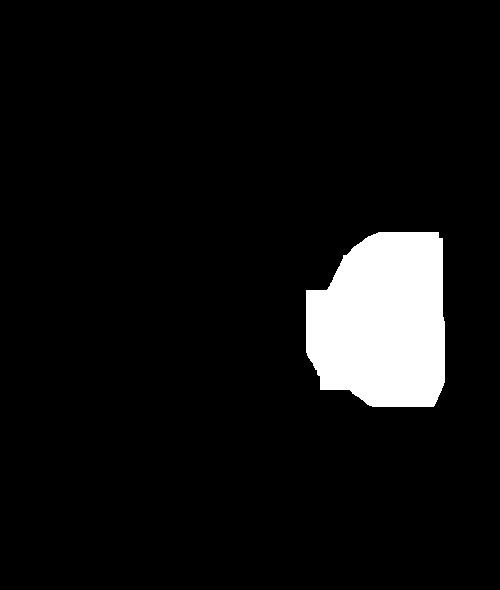

In [155]:
cv2_imshow(closed)

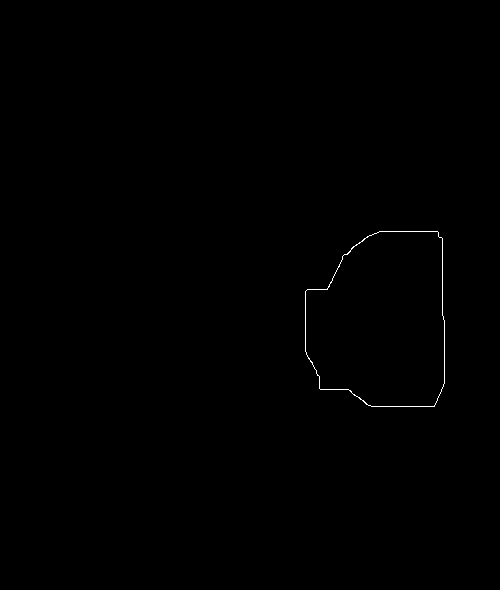

In [156]:
def auto_canny(image, sigma=0.33):
  # compute the median of the single channel pixel intensities
  v = np.median(image)
  # apply automatic Canny edge detection using the computed median
  lower = int(max(0, (1.0 - sigma) * v))
  upper = int(min(255, (1.0 + sigma) * v))
  edged = cv2.Canny(image, lower, upper)
  # return the edged image
  return edged
canny = auto_canny(closed)
cv2_imshow(canny)

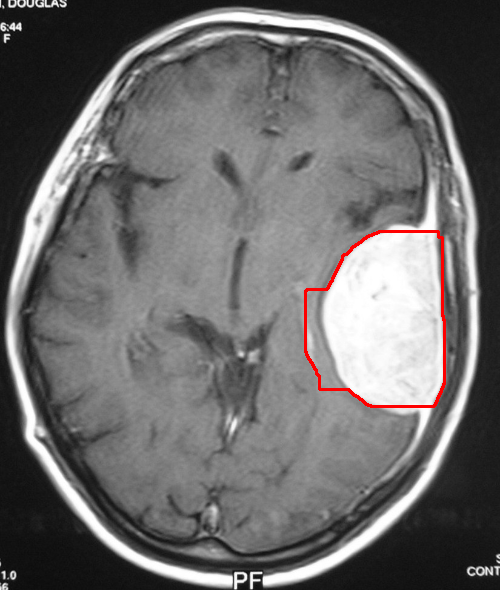

In [157]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, cnts, -1, (0, 0, 255),2)
cv2_imshow(image) 